# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
import os

from waymo_open_dataset import dataset_pb2 as open_dataset
from waymo_open_dataset.utils import range_image_utils
from waymo_open_dataset.utils import transform_utils
from waymo_open_dataset.utils import  frame_utils

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tensorflow.compat.v1 as tf


%matplotlib inline

In [2]:
data_dir = '/data/waymo/*.tfrecord'
dataset = get_dataset(data_dir)

INFO:tensorflow:Reading unweighted datasets: ['/data/waymo/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/data/waymo/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 103
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


In [6]:
print("Lets print just the first row in dataset :","\n",list(dataset.take(1).as_numpy_iterator()),"\n")

Lets print just the first row in dataset : 
 [{'image': array([[[ 56,  86, 122],
        [ 56,  86, 122],
        [ 56,  86, 122],
        ...,
        [ 57,  87, 125],
        [ 59,  87, 126],
        [ 60,  88, 127]],

       [[ 56,  86, 122],
        [ 56,  86, 122],
        [ 57,  87, 123],
        ...,
        [ 58,  88, 126],
        [ 59,  87, 126],
        [ 60,  88, 127]],

       [[ 55,  85, 121],
        [ 56,  86, 122],
        [ 57,  87, 123],
        ...,
        [ 59,  89, 127],
        [ 60,  88, 127],
        [ 60,  88, 127]],

       ...,

       [[ 64,  69,  73],
        [ 66,  71,  75],
        [ 68,  73,  77],
        ...,
        [ 68,  75,  83],
        [ 68,  75,  83],
        [ 66,  73,  81]],

       [[ 64,  69,  73],
        [ 66,  71,  75],
        [ 67,  72,  76],
        ...,
        [ 69,  76,  84],
        [ 68,  75,  83],
        [ 67,  74,  82]],

       [[ 65,  70,  74],
        [ 66,  71,  75],
        [ 65,  70,  74],
        ...,
        [ 67,  74,

In [ ]:
for coord, label in zip(batch["groundtruth_boxes"].numpy(), batch["groundtruth_classes"].numpy()):
        ax.add_patch(patches.Rectangle(
        xy=(label.box.center_x - 0.5 * image.shape[0],
            label.box.center_y - 0.5 * image.shape[1]),
        width=label.box.length,
        height=label.box.width,
        linewidth=1,
        edgecolor='red',
        facecolor='none'))

In [84]:
def display_image_test(batch, index):
    print(index)
    color_map = {1: 'red', 2: 'blue', 3: 'green', 4: 'black'}
    
    _, ax = plt.subplots()
    image = batch["image"].numpy()
    ax.imshow(image)
    
    for coord, label in zip(batch["groundtruth_boxes"].numpy(), batch["groundtruth_classes"].numpy()):
        ax.add_patch(patches.Rectangle(
            xy=(coord[0] * image.shape[0],
                coord[1] * image.shape[1]),
            width=(coord[3] - coord[1]) * image.shape[1],
            height=(coord[2] - coord[0]) * image.shape[0],
            linewidth=1,
            edgecolor=color_map[label],
            facecolor='none'))
        
    plt.grid(False)
    plt.axis('off')

Lets print using the batch.items() :
0


<Figure size 720x720 with 0 Axes>

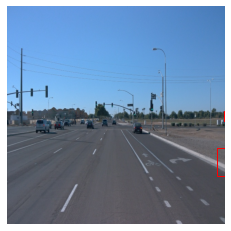

In [86]:
print("Lets print using the batch.items() :")


plt.figure(figsize=(10, 10))


for index, batch in enumerate(dataset.shuffle(75, reshuffle_each_iteration=True).take(1)):
    #for m1,m2 in batch.items():
    #    print("{:20s}: {}".format(m1, m2))
    
    display_image_test(batch, index)
    
plt.show()    
    

In [19]:
# read files
data_dir = '/data/waymo/'

frame = []
i = 0

os.chdir(data_dir)
    
for file in os.listdir():
    if file.endswith('.tfrecord'):
        file_path = f"{data_dir}{file}"
        
        dataset = tf.data.TFRecordDataset(file_path, compression_type = '')
        
        for data in dataset:
            frame = open_dataset.Frame()
            frame.ParseFromString(bytearray(data.numpy()))
            break
            
        

In [21]:
(range_images, camera_projections,
 range_image_top_pose) = frame_utils.parse_range_image_and_camera_projection(frame)

In [18]:
def countRecords(ds:tf.data.Dataset):
  count = 0

  if tf.executing_eagerly():
    # TF v2 or v1 in eager mode
    for r in ds:
      count += 1
  else:  
    # TF v1 in non-eager mode
    iterator = tf.compat.v1.data.make_one_shot_iterator(ds)
    next_batch = iterator.get_next()
    with tf.compat.v1.Session() as sess:
      try:
        while True:
          sess.run(next_batch)
          count = count+1    
      except tf.errors.OutOfRangeError:
        pass
  
  return count

199


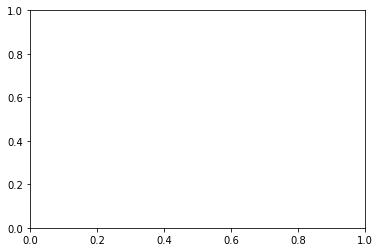

In [23]:
filenames =['/data/waymo/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord']

raw_dataset = tf.data.TFRecordDataset(filenames, compression_type='')

for data in raw_dataset:
    frame = open_dataset.Frame()
    frame.ParseFromString(bytearray(data.numpy()))
    break
    
(range_images, camera_projections,
 range_image_top_pose) = frame_utils.parse_range_image_and_camera_projection(frame)

fig, ax = plt.subplots() 
print(countRecords(raw_dataset))

## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [24]:
def show_camera_image(camera_image, camera_labels, layout, cmap=None):
    """Show a camera image and the given camera labels."""

    ax = plt.subplot(*layout)

    # Draw the camera labels.
    for camera_labels in frame.camera_labels:
        # Ignore camera labels that do not correspond to this camera.
        if camera_labels.name != camera_image.name:
            continue

        # Iterate over the individual labels.
        for label in camera_labels.labels:
        # Draw the object bounding box.
            ax.add_patch(patches.Rectangle(
                xy=(label.box.center_x - 0.5 * label.box.length,
                    label.box.center_y - 0.5 * label.box.width),
                    width=label.box.length,
                    height=label.box.width,
                    linewidth=1,
                    edgecolor='red',
                    facecolor='none'))

    # Show the camera image.
    plt.imshow(tf.image.decode_jpeg(camera_image.image), cmap=cmap)
    plt.title(open_dataset.CameraName.Name.Name(camera_image.name))
    plt.grid(False)
    plt.axis('off')

plt.figure(figsize=(25, 20))

for index, image in enumerate(frame.images):
    show_camera_image(image, frame.camera_labels, [3, 3, index+1])

<Figure size 1800x1440 with 0 Axes>

In [4]:
def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    try:
        # color map
        color_map = {1: 'red', 2: 'blue', 4: 'green'}
    
    
        fig, ax = plt.subplots() 
        im = batch["image"].numpy()
        ax.imshow(im)
    
        # draw bounding boxes and add color to different class labels
        for coord, label in zip(batch["groundtruth_boxes"].numpy(), batch["groundtruth_classes"].numpy()):
            for label in camera_labels.labels:
              # Draw the object bounding box.
              ax.add_patch(patches.Rectangle(
                xy=(label.box.center_x - 0.5 * label.box.length,
                    label.box.center_y - 0.5 * label.box.width),
                width=label.box.length,
                height=label.box.width,
                linewidth=1,
                edgecolor='red',
                facecolor='none'))
            #taken from class notes
            width = (coord[3] - coord[1])*im.shape[1]
            height = (coord[2] - coord[0])*im.shape[0]
            rec = patches.Rectangle(xy, width, height, linewidth=1, edgecolor=color_map[label], facecolor='none')
            ax.add_patch(rec)
        plt.axis("off")
    except Exception as err:
        print(err)        
        
    

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(10):
    for batch in dataset.shuffle(75, reshuffle_each_iteration=True).take(1):
        display_images(batch)
plt.show()

In [6]:
plt.figure(figsize=(10, 10))

for i in range(10):
    for batch in dataset.shuffle(75, reshuffle_each_iteration = True).take(1):
        display_instances(batch)
        
plt.show()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 40: invalid start byte

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...